# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import math

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


Temperature in the dataset: mean = 98.249231 stdev = 0.733183


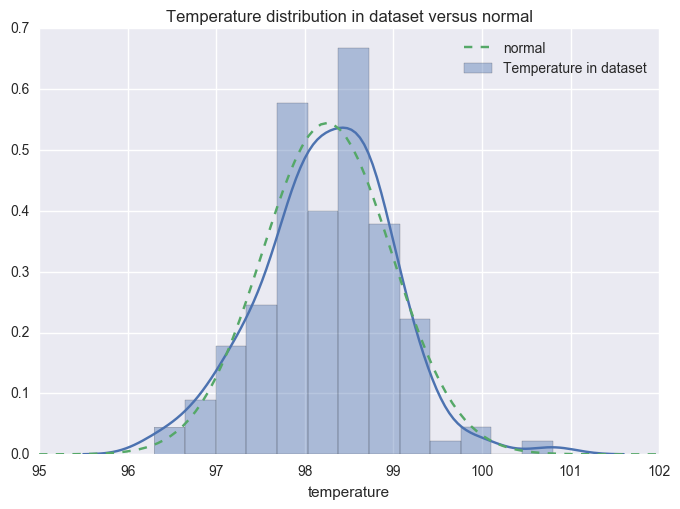

In [3]:
# caluclate statsictics for dataset 
mean = df.temperature.mean()
std  = df.temperature.std()
print "Temperature in the dataset: mean = %f stdev = %f" % (mean,std)

# Plot temperature distribution in the data set
sns.distplot(df.temperature, label = 'Temperature in dataset')

#plot normal distribution
x = np.linspace(95,102,100)
y = stats.norm.pdf(x,mean,std)
plt.plot(x, y, linestyle = '--', label = 'normal')
plt.title('Temperature distribution in dataset versus normal') 
plt.legend();

In [4]:
# Test for normality 
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

At 5% level we reject the hypothesis

In [5]:
# Check sample size
sample_size = len(df)
print 'Sample size: %d' %sample_size

Sample size: 130


If the temperature was taken from different people, it shoudl be an indepedent obseravtions

In [6]:
# test population mean using one sample test
stats.ttest_1samp(a= df.temperature, popmean=98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [7]:
stats.t.ppf(q=0.025, df=sample_size)

-1.9783804054271532

In [8]:
#calcuate confidence interval
sigma = df.temperature.std()/math.sqrt(sample_size)  # Sample stdev/sample size
stats.t.interval(0.95,  df = sample_size, loc = mean,  scale= sigma)

(98.122012170976276, 98.376449367485279)

Average temperature by gender
gender
F    98.393846
M    98.104615
Name: temperature, dtype: float64


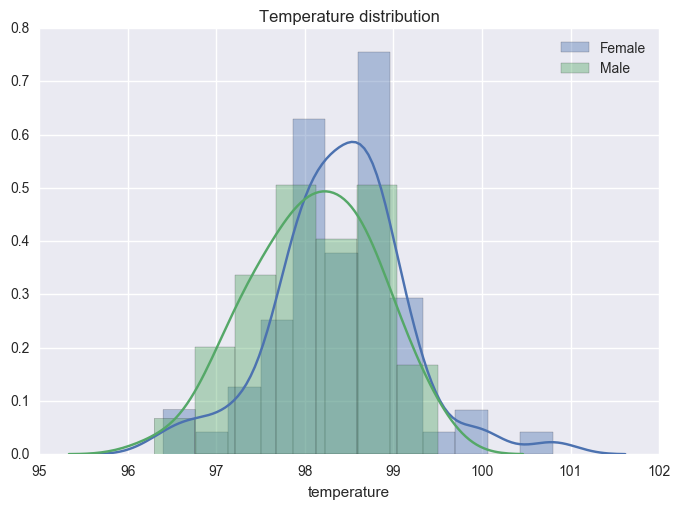

In [9]:
# temperature by gender
print 'Average temperature by gender'
print df.groupby(by='gender')['temperature'].mean()
sns.distplot(df.temperature[df.gender == 'F'], hist = True, label = 'Female')
sns.distplot(df.temperature[df.gender == 'M'], hist = True, label = 'Male')
plt.title('Temperature distribution') 
plt.legend();

In [10]:
# test if average temperature differs for men and women
men_temp = df.temperature[df.gender == 'M']
women_temp = df.temperature[df.gender == 'F']
stats.ttest_ind(a= men_temp, b= women_temp, equal_var=False)

Ttest_indResult(statistic=-2.2854345381656112, pvalue=0.023938264182934196)